## Analysis of Hacker News Submissions

Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

Below are descriptions of the columns of the dataset, collated for submissions that received comments:

- **id**: The unique identifier from Hacker News for the post
- **title**: The title of the post
- **url**: The URL that the posts link to, if it the post has a URL
- **num_points**: The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
- **num_comments**: The number of comments that were made on the post
- **author**: The username of the person who submitted the post
- **created_at**: The date and time at which the post was submitted

### Purpose of the Analysis

We're specifically interested in posts whose titles begin with either Ask HN or Show HN. Users submit Ask HN posts to ask the Hacker News community a specific question, and these questions will normally begin with "Ask HN:". Likewise, users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting. Also, these questions will begin with "Show HN:"

We'll compare these two types of posts to determine the following:

- Do Ask HN or Show HN receive more comments and points on average?
- Do posts created at a certain time receive more comments and points on average?

Let's start by importing the libraries we need and reading the data set into a Pandas dataframe.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import math
import matplotlib.pyplot as plt


# Load the dataset
hn_df = pd.read_csv(r"hacker_news.csv")

# View the first five rows
hn_df.head()

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


In [2]:
# Check the shape or dimension of the dataset
hn_df.shape

(293119, 7)

### Period of time for which data was collected

Let us check the duration when the dataset was collect, which we could use to base the result of the final analysis.

In [3]:
# Convert the "created_at" column to a datetime colum
hn_df["date"] = pd.to_datetime(hn_df["created_at"])

# Sort the dateframe based on the new column to ensure the dataframe is ordered
hn_df = hn_df.sort_values("date")

# Display the first and the last date
print("The first entry was posted by {}.".format(hn_df["date"][0]))
print("The last entry was posted by {}.".format(hn_df["date"][len(hn_df)-1]))

The first entry was posted by 2016-09-26 03:26:00.
The last entry was posted by 2015-09-06 05:50:00.


For this analysis, we are looking at a year's worth of Hacker News submissions, with 293,119 posts. This is a considerably large number, and therefore could give a good indication of the validity of the results of this analysis.

### Extracting Ask HN and Show HN Posts

Since we're only concerned with post titles beginning with Ask HN or Show HN, we'll extract posts/titles and save then in separate dataframes.

#### Ask Posts

In [4]:
# Extract posts that begin with Ask HN
ask_posts = hn_df[hn_df["title"].str.lower().str.startswith("ask hn")]
ask_posts.head()

,id,title,url,num_points,num_comments,author,created_at,date
293114,10176919,Ask HN: What is/are your favorite quote(s)?,NaN,15,20,kumarski,9/6/2015 6:02,2015-09-06 06:02:00
293073,10177200,Ask HN: Where do you look for work if you need...,NaN,14,20,coroutines,9/6/2015 9:36,2015-09-06 09:36:00
293055,10177309,Ask HN: Any recommendations for books about ra...,NaN,2,4,rationalthrowa,9/6/2015 10:46,2015-09-06 10:46:00
293052,10177317,Ask HN: Any meteor devs out there who could sp...,NaN,2,1,louisswiss,9/6/2015 10:52,2015-09-06 10:52:00
293047,10177359,Ask HN: Is coursera specialization in product ...,NaN,1,0,pipipzz,9/6/2015 11:27,2015-09-06 11:27:00


#### Show Posts

In [5]:
# Extract posts that begin with Show HN
show_posts = hn_df[hn_df["title"].str.lower().str.startswith("show hn")]
show_posts.head()

,id,title,url,num_points,num_comments,author,created_at,date
293037,10177421,Show HN: Popularity scoring for arXiv publicat...,https://gist.github.com/nebw/5504697c118744677c2d,17,1,nebw,9/6/2015 12:16,2015-09-06 12:16:00
293028,10177459,Show HN: AppyPaper Gift wrap with app icons p...,http://www.appypaper.com/,6,4,submitstartup,9/6/2015 12:38,2015-09-06 12:38:00
293019,10177511,Show HN: MockTheClock A tiny JavaScript libra...,https://github.com/zb3/MockTheClock,18,6,zb3,9/6/2015 13:02,2015-09-06 13:02:00
293002,10177631,Show HN: Immutable and type-checked state and ...,https://github.com/gcanti/redux-tcomb,20,2,gcanti,9/6/2015 13:50,2015-09-06 13:50:00
292995,10177714,Show HN: Repartee The SMS Messaging Stack for...,https://github.com/markgreenall/Repartee,2,0,Nuratu,9/6/2015 14:21,2015-09-06 14:21:00


#### Other Posts
There are also other posts that begin with neither "Ask HN" nor "Show HN". Let's call these posts "other_posts".

In [6]:
post_type = ("show", "ask")

# Check that the title does not start with "Ask" or "Show"
other_title = [title for title in hn_df["title"].str.lower() if not title.startswith(post_type)]
other_posts = hn_df[hn_df["title"].str.lower().isin(other_title)]
other_posts.head()

,id,title,url,num_points,num_comments,author,created_at,date
293118,10176903,Toyota Establishes Research Centers with MIT a...,http://newsroom.toyota.co.jp/en/detail/9233109/,4,0,tim_sw,9/6/2015 5:50,2015-09-06 05:50:00
293117,10176907,"PHP 7 Coolest Features: Space Ships, Type Hint...",https://www.zend.com/en/resources/php-7,2,0,Garbage,9/6/2015 5:55,2015-09-06 05:55:00
293116,10176908,Dying vets fuck you letter (2013),http://dangerousminds.net/comments/dying_vets_...,10,2,mycodebreaks,9/6/2015 5:56,2015-09-06 05:56:00
293115,10176917,Attention and awareness in stage magic: turnin...,http://people.cs.uchicago.edu/~luitien/nrn2473...,14,0,stakent,9/6/2015 6:01,2015-09-06 06:01:00
293113,10176923,Why we aren't tempted to use ACLs on our Unix ...,https://utcc.utoronto.ca/~cks/space/blog/sysad...,34,23,mjn,9/6/2015 6:03,2015-09-06 06:03:00


In [7]:
print("The length of ask posts is {}".format(ask_posts.shape[0]))
print("The length of show posts is {}".format(show_posts.shape[0]))
print("The length of other posts is {}".format(other_posts.shape[0]))

The length of ask posts is 9139
The length of show posts is 10158
The length of other posts is 273632


Clearly there are  more posts that are neither ask nor show posts, with ask posts being the least.

### Calculate the average number of comments for the Ask Posts and the Show Posts

Let us determine if ask posts or show posts receive more comments on average.

In [8]:
def avg_comments(comment):
    """Function takes the comments and returns 
    the average number of comment per post type"""
    return comment.sum()/len(comment)

avg_ask_comment   = avg_comments(ask_posts["num_comments"])
avg_show_comment  = avg_comments(show_posts["num_comments"])
avg_other_comment = avg_comments(other_posts["num_comments"])

In [9]:
print("The average number of ask comments is {}".format(int(avg_ask_comment)))
print("The average number of show comments is {}".format(int(avg_show_comment)))
print("The average number of other comments is {}".format(int(avg_other_comment)))

The average number of ask comments is 10
The average number of show comments is 4
The average number of other comments is 6


On the average, the data shows that ask posts receive more comments than show posts. Other posts also attract more comments that the show posts. This goes to show that the Hacker News site could be more beneficial to people who have questions on particular topics than to people who would love to show things to the community. This is not conclusive in itself.

Next, we'll determine if posts created at a certain time are more likely to attract comments. We'll use the following steps to perform this analysis:

 - _Calculate the amount of posts created in each hour of the day, along with the number of comments received._
 - _Calculate the average number of comments each category of post received per hour._
 - _Calculate the average number of points each category of post received per hour._
 - _Compare the results for both Ask posts and Show posts._

### Create Dictionaries of Posts and Comments per Hour

In [10]:
def post_count_per_hour(df, commments_or_points_col, created_col):
    """Returns the number of posts created per hour and the number 
    of comments or points for each category of post per hour"""
    
    date_post              = [] # to hold a list of the time of post and the number of comments
    post_counts_by_hour    = {} # number of posts created during each hour of the day.
    post_attribute_by_hour = {} # corresponding number of comments or points for posts at each hour.
    
    # create a list of lists made up of a pair of the "created_at" and "num_comments" or "num_points" columns
    for i in range(len(df)):
        date_post.append([df[created_col].iloc[i], df[commments_or_points_col].iloc[i]])
    
    # create dictionaries of post per hour and number of comments or points per hour
    for item in date_post:
        time_obj = dt.datetime.strptime(item[0], "%m/%d/%Y %H:%M")
        hour = time_obj.strftime("%H")
        
        if hour in post_counts_by_hour:
            post_counts_by_hour[hour]    += 1
            post_attribute_by_hour[hour] += item[1]
        else:
            post_counts_by_hour[hour]    = 1
            post_attribute_by_hour[hour] = item[1]
    
    return [post_counts_by_hour, post_attribute_by_hour]

### ASK POSTS
#### Number of Ask Posts per Hour

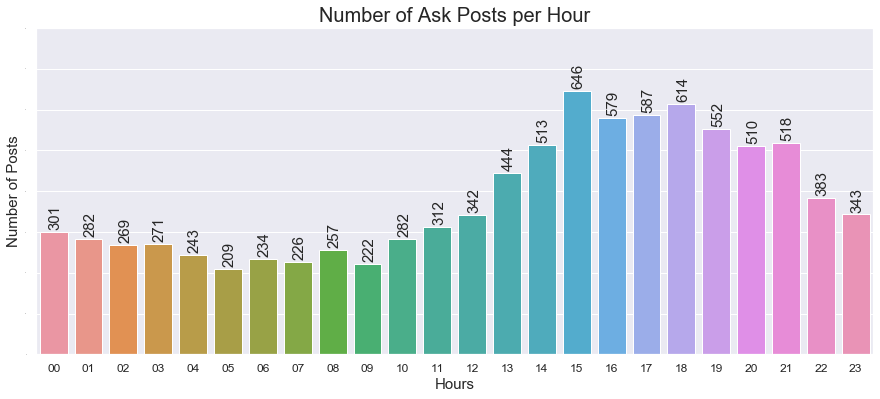

In [12]:
# Number of ask posts per hour
ask_posts_per_hour = post_count_per_hour(ask_posts, "num_comments", "created_at")[0]

# Extract the hours and the number of ask posts per hour
keys   = list(ask_posts_per_hour.keys())   # hours
values = list(ask_posts_per_hour.values()) # number of posts per hour


def barplot(key, value):
    """Creates a bar plot of the number of posts per hour"""
    
    # Plot the number of posts per hour
    sns.set(style="darkgrid")
    fig = plt.figure(figsize=(15,6))
    ax = sns.barplot(x=keys, y=values)
    
    # Set the exact number of posts per hour on each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate('{}'.format(math.ceil(height)), (p.get_x()+.25, height),
                    xytext = (0, 5), rotation=90, fontsize=15,
                   textcoords="offset points")

        
# Create the bar plot
barplot(keys, values)        
plt.ylim(top=800)
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Number of Posts", fontsize=15)
plt.title("Number of Ask Posts per Hour", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=0)
plt.show()

#### Number of Ask Posts Comments per Hour

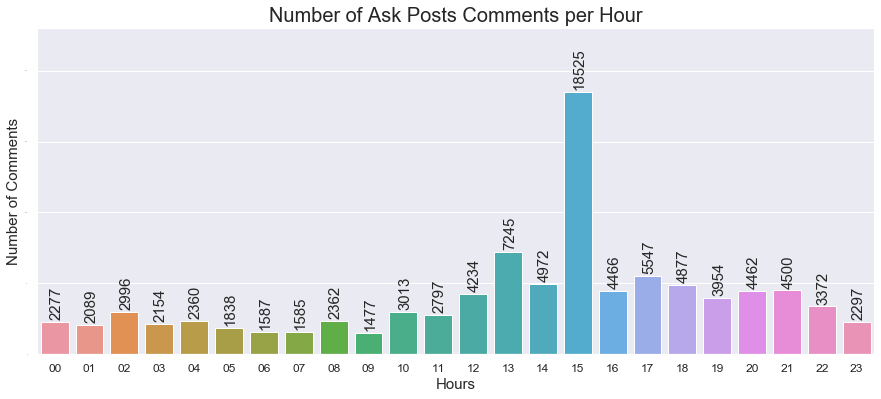

In [13]:
# Number of ask posts comments per hour
ask_posts_comments_per_hour = post_count_per_hour(ask_posts, "num_comments", "created_at")[1]

# Extract the hours and the number of ask posts comments per hour
keys   = list(ask_posts_comments_per_hour.keys())    # hours
values = list(ask_posts_comments_per_hour.values())  # number of ask posts comments per hour


# Create the bar plot
barplot(keys, values) 
plt.ylim(top=23000)
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Number of Comments", fontsize=15)
plt.title("Number of Ask Posts Comments per Hour", fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=0)
plt.show()

The bar plots indicate that people tend to post and comment more as the day progresses, with the activities peaking after mid-day. It is interesting to see how the number of comments overshoots at about 3pm (18,525 comments in an hour). This could be as a result of workers finishing from work or students closing for the day at about 3pm, and therefore having more time to themselves to go online. We can also see that the activities diminish as the day draws to an end. 

Therefore anyone looking for answers in the Hacker News site can be advised to be send a post from lunch time onwards.

#### Calculating the Average Number of Comments for Ask HN Posts by Hour

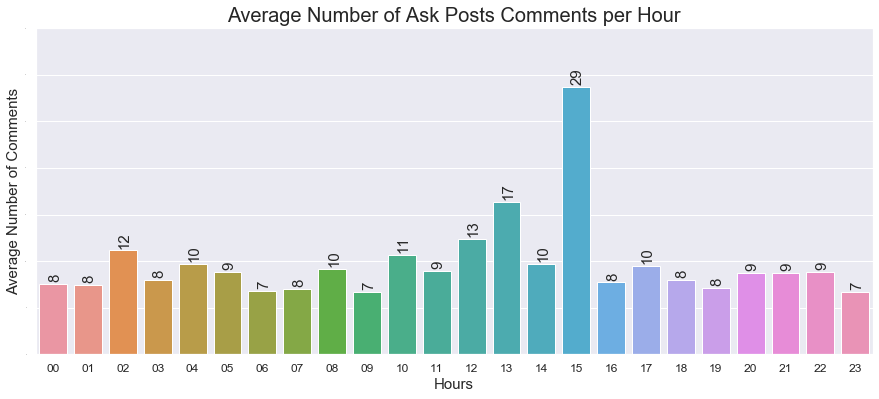

On the average, the number of ask post comments is 10.0 comments per hour


In [14]:
ave_comment_per_hour = []

# calculate the average number of ask post comments per hour
for hr in sorted(ask_posts_comments_per_hour):
    ave_comment_per_hour.append([hr, ask_posts_comments_per_hour[hr]/ask_posts_per_hour[hr]])

# Extract the hours and the average number of ask posts comments per hour
keys   = [key[0] for key in ave_comment_per_hour]
values = [round(value[1],2) for value in ave_comment_per_hour]
 
# Create the bar plot
barplot(keys, values)
plt.ylim(top=35)
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Average Number of Comments", fontsize=15)
plt.title("Average Number of Ask Posts Comments per Hour", fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=0)
plt.show()

print("On the average, the number of ask post comments is {} comments per hour".format(round(np.mean(values))))

The bar plot of the average number of comments per hour follows a similar pattern as seen earlier, with the average number of comments per hour peaking at about 3pm, and averaging at 10 comments per hour.

### SHOW POSTS
#### Number of Show Posts Per Hour

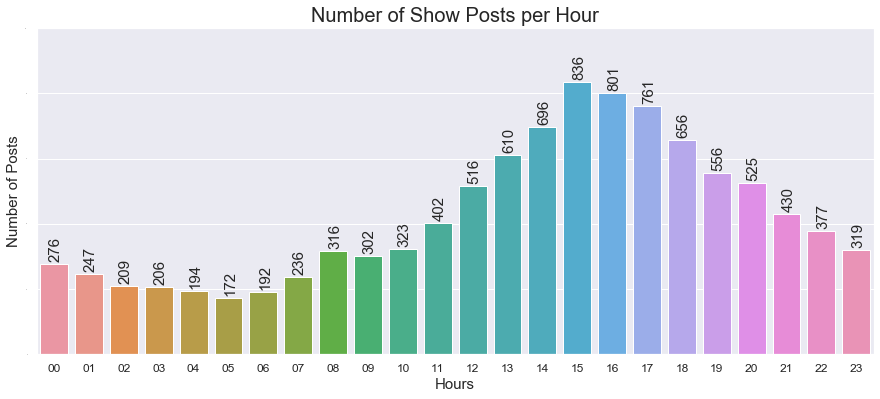

In [15]:
# Number of show posts per hour
show_posts_per_hour = post_count_per_hour(show_posts, "num_comments", "created_at")[0]

# Extract the hours and the number of ask posts per hour
keys   = list(show_posts_per_hour.keys())   # hours
values = list(show_posts_per_hour.values()) # number of show posts per hour
   
# Create the bar plot
barplot(keys, values)        
plt.ylim(top=1000)
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Number of Posts", fontsize=15)
plt.title("Number of Show Posts per Hour", fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=0)
plt.show()

#### Number of Show Post Comments per Hour

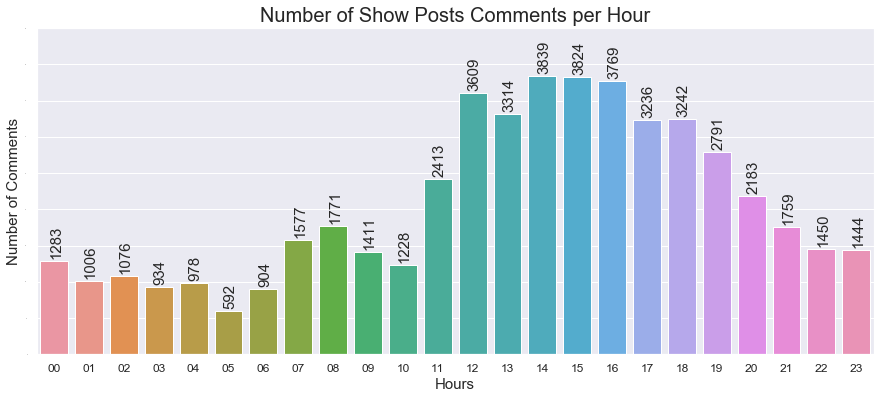

In [16]:
# Number of show posts comments per hour
show_posts_comments_per_hour = post_count_per_hour(show_posts, "num_comments", "created_at")[1]

# Extract the hours and the number of show posts comments per hour
keys   = list(show_posts_comments_per_hour.keys())   # hours
values = list(show_posts_comments_per_hour.values()) # number of show post comments

# Create the bar plot
barplot(keys, values) 
plt.ylim(top=4500)
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Number of Comments", fontsize=15)
plt.title("Number of Show Posts Comments per Hour", fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=0)
plt.show()

#### Calculating the Average Number of Comments for Show HN Posts by Hour

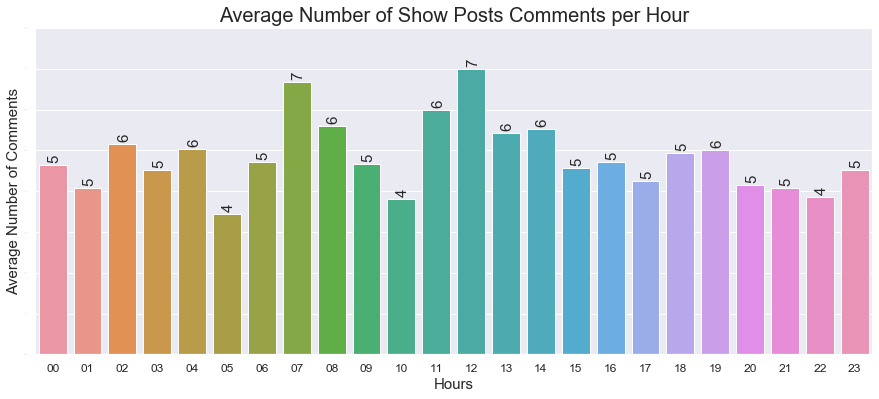

On the average, the number of show post comments is 5.0 comments per hour


In [17]:
ave_comment_per_hour = []

# calculate the average number of show post comments per hour
for hr in sorted(show_posts_comments_per_hour):
    ave_comment_per_hour.append([hr, show_posts_comments_per_hour[hr]/show_posts_per_hour[hr]])

# Extract the hours and the average number of show posts comments per hour
keys   = [key[0] for key in ave_comment_per_hour]
values = [round(value[1],2) for value in ave_comment_per_hour]
 
# Create the bar plot
barplot(keys, values)
plt.ylim(top=8)
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Average Number of Comments", fontsize=15)
plt.title("Average Number of Show Posts Comments per Hour", fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=0)
plt.show()

print("On the average, the number of show post comments is {} comments per hour".format(round(np.mean(values))))

Analysis of the show posts show a similar pattern as the ask posts. The show posts and comments peak after mid-day, with an average of 5 show post comments per hour.

### Determine if Show or Ask Posts Receive More Points on Average

In [18]:
sum_ask_point  = ask_posts["num_points"].sum()/ask_posts.shape[0]
sum_show_point = show_posts["num_points"].sum()/show_posts.shape[0]

print("Average ask posts points:  {:,.2f}".format(sum_ask_point))
print("Average show posts points: {:,.2f}".format(sum_show_point))

Average ask posts points:  11.31
Average show posts points: 14.84


On the average, the show posts receive more points than the ask posts.

### Determine if posts created at a certain time are more likely to receive more points.

We have already created the "post_count_per_hour" function above for this purpose also, and therefore will replace the "num_comments" column with the "num_points" column.

#### For the Ask Posts

In [19]:
ask_posts_per_hour        = post_count_per_hour(ask_posts, "num_points", "created_at")[0] # number of ask post per hour
ask_posts_points_per_hour = post_count_per_hour(ask_posts, "num_points", "created_at")[1] # number of ask post points/hour

#### Visualizing the Post Points per Hour

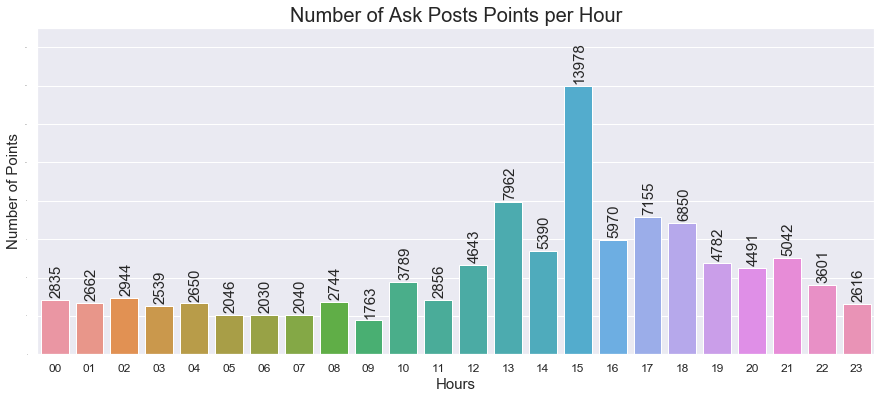

In [20]:
# Extract the hours and the number of ask posts points per hour
keys   = list(ask_posts_points_per_hour.keys())
values = list(ask_posts_points_per_hour.values())
  
# Create the bar plot   
barplot(keys, values)
plt.ylim(top=17000)
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Number of Points", fontsize=15)
plt.title("Number of Ask Posts Points per Hour", fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=0)
plt.show()

#### Calculating the Average Number of Points for Ask HN Posts by Hour

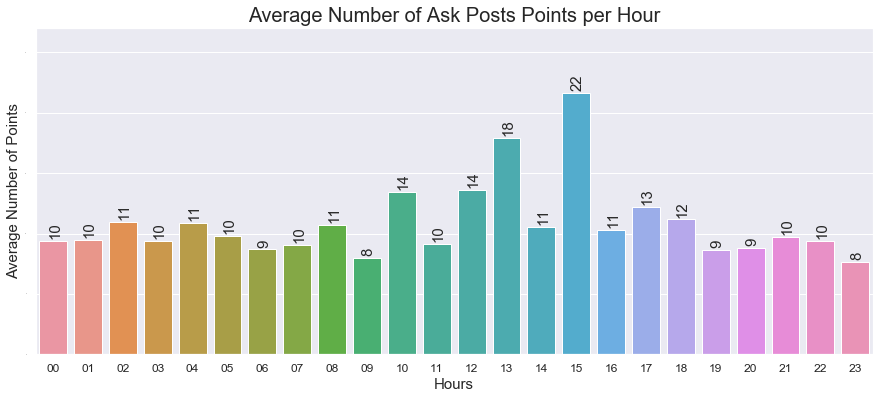

On the average, the number of ask post points is 11.0 comments per hour


In [21]:
ave_ask_posts_points_per_hour = []

# calculate the average number of ask post points per hour
for hr in sorted(ask_posts_points_per_hour):
    ave_ask_posts_points_per_hour.append([hr, ask_posts_points_per_hour[hr]/ask_posts_per_hour[hr]])

# Extract the hours and the average number of ask posts comments per hour
keys   = [key[0] for key in ave_ask_posts_points_per_hour]
values = [round(value[1],2) for value in ave_ask_posts_points_per_hour]
 
# Create the bar plot
barplot(keys, values)
plt.ylim(top=27)
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Average Number of Points", fontsize=15)
plt.title("Average Number of Ask Posts Points per Hour", fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=0)
plt.show()

print("On the average, the number of ask post points is {} comments per hour".format(round(np.mean(values))))

The result shows that ask posts posted after lunch time are very likely to receive more points than ask posts posted at other times, a similar pattern as seen with posts and comments, with the points averaging at 11 points per hour.

#### For the Show Posts

In [22]:
show_posts_per_hour        = post_count_per_hour(show_posts, "num_points", "created_at")[0] # number of ask post hour
show_posts_points_per_hour = post_count_per_hour(show_posts, "num_points", "created_at")[1] # number of show post points/hour

#### Visualizing the Post Points per Hour

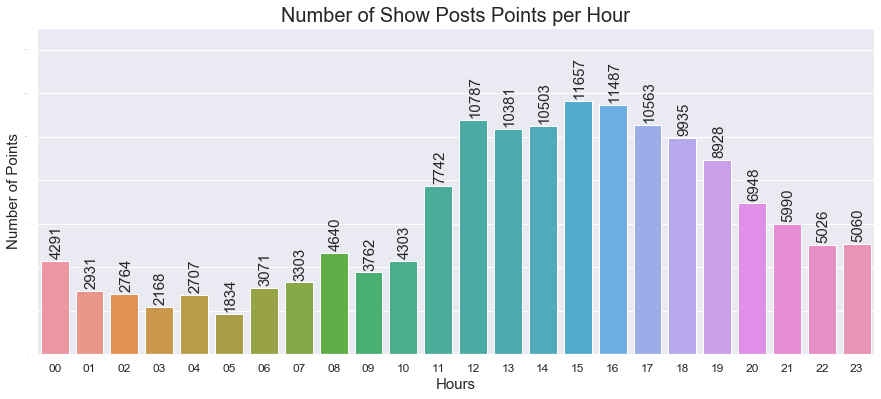

In [23]:
# Extract the hours and the number of show posts points per hour
keys   = list(show_posts_points_per_hour.keys())
values = list(show_posts_points_per_hour.values())
 
# Create the bar plot
barplot(keys, values)
plt.ylim(top=15000)
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Number of Points", fontsize=15)
plt.title("Number of Show Posts Points per Hour", fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=0)
plt.show()

#### Calculating the Average Number of Points for Show HN Posts by Hour

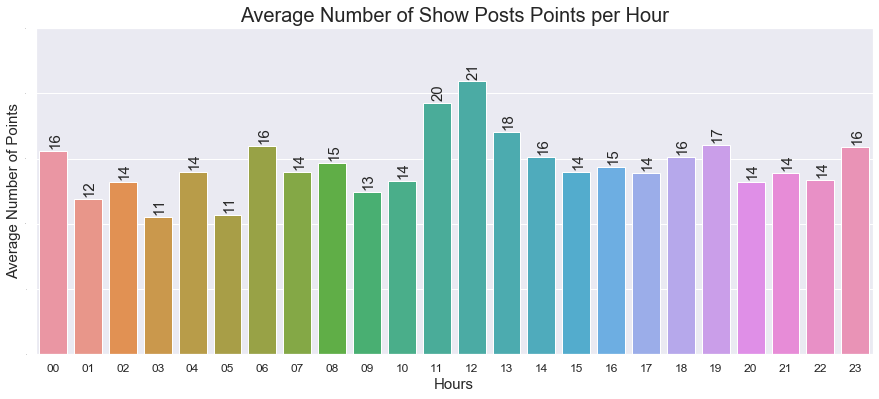

On the average, the number of show post points is 15.0 comments per hour


In [24]:
ave_show_posts_points_per_hour = []

# calculate the average number of show post points per hour
for hr in sorted(show_posts_points_per_hour):
    ave_show_posts_points_per_hour.append([hr, show_posts_points_per_hour[hr]/show_posts_per_hour[hr]])

# Extract the hours and the average number of show posts comments per hour
keys   = [key[0] for key in ave_show_posts_points_per_hour]
values = [round(value[1],2) for value in ave_show_posts_points_per_hour]
 
# Create the bar plot
barplot(keys, values)
plt.ylim(top=25)
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Average Number of Points", fontsize=15)
plt.title("Average Number of Show Posts Points per Hour", fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=0)
plt.show()

print("On the average, the number of show post points is {} comments per hour".format(round(np.mean(values))))

Although the number of points per hour for the show posts peaks at around 3pm to 4pm, on the average, the points peaks at about mid-day, averaging at about 15 points per hour.

### Conclusion

In this project, we analyzed data from the Hacker News site, which comprises of ask posts (questions on specific topics), show posts (posts on projects, products or general fun topics) and other general posts. The objective of the analysis is to determine which posts (ask or show) receive the most comments from the Hacker News community, and at what hour a post is more likely to receive the most comments and points.

The result of the analysis shows that on the average, the ask posts receive more comments (10 comments/hour) than the show posts (5 comments/hour). This result indicates that the Hacker News community is a site that could be recommended to users requiring answers to certain (possibly technical) questions. The result also shows that for users who are in search of answers to specific questions, they are more likely to receieve answers quicker if questions are posted after mid-day, as activities tend to peak at around 3pm. The same applies to users interested in receiving more points for posts created on Hacker News. 

In conclusion, we have looked at a year's worth of Hacker News submissions, with 293,119 posts. As stated at the start, this is considerably a large number of post, therefore the recommendations given above can be considered valid enough to based judgment upon on what type of posts to submit on the Hacker News website and at what time.